In [2]:
import pandas as pd

# Load the processed data from runs_processed.csv
runs = pd.read_csv("runs_processed.csv")

# 1. Exploratory Analysis, Data Collection, Pre-Preprocessing and Discussion


## 1.1 Context
**Where does your dataset come from? What is it for, how was it collected, etc.?**

Our dataset, stored in a DataFrame called `runs`, comes from our own exported GPS activity logs from Strava (a popular social media app to record workouts). We each downloaded our Strava data directly from Strava and merged the "activity.csv" files together to create one comprehensive dataset with all of our data. We even got some of our friends who also use Strava regularly to send us their statistics as well. Each row corresponds to a single activity with summary statistics such as:

- `Activity Date`, `Activity Type`
- `Moving Time`
- `Distance`
- `Pace`, `Grade Adjusted Pace`
- `Average Speed`, `Average Grade Adjusted Speed`
- `Elevation Gain`
- `Person`

We focus on **running activities** where `Activity Type` indicates a run.

In [3]:
runs.sample(5)

,Activity Date,Activity Type,Distance,Pace,Moving Time,Average Speed,Elevation Gain,Average Grade Adjusted Speed,Grade Adjusted Pace,Person
76,2/13/25,Run,5.24,7:51,41:06,7.65,319.9,7.83,7:40,Sam
372,5/28/25,Run,4.68,7:16,34:01,8.26,255.9,8.38,7:10,Zubin
204,7/16/25,Run,2.73,7:26,20:16,8.08,36.7,8.10,7:24,Alex
154,11/28/24,Run,3.11,7:07,22:07,8.44,26.6,8.46,7:06,Alex
311,4/17/25,Run,3.00,9:01,27:05,6.65,84.3,6.63,9:03,Audrey


## 1.2 Discussion
**Report how you processed the data (or how it was already processed)**

Key preprocessing steps:

- Add person column 
- Keep only relevant columns (activity, time, elevation, grade, person)
- Format columns to not be in imperial system (time column, mph column, distance, speed) 
- Filter to **running activities** only
- Merge all runners into one dataframe 
- Split into train/test

In [4]:
# Load the processed data from runs_processed.csv
runs = pd.read_csv("runs_processed.csv")

## 1.3 Code 
**Support your analysis with tables, plots, statistics, etc.**

DATASET OVERVIEW
Total number of runs: 424
Number of unique runners: 5
Date range: 2023-09-05 00:00:00 to 2025-11-26 00:00:00

RUNS PER PERSON
Person
Alex      128
Audrey    110
Zubin      84
Sam        73
Karina     29
dtype: int64



/var/folders/xb/jy20y8px72jfxywp5jks_bnc0000gn/T/ipykernel_24220/412487770.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  runs['Activity Date'] = pd.to_datetime(runs['Activity Date'])


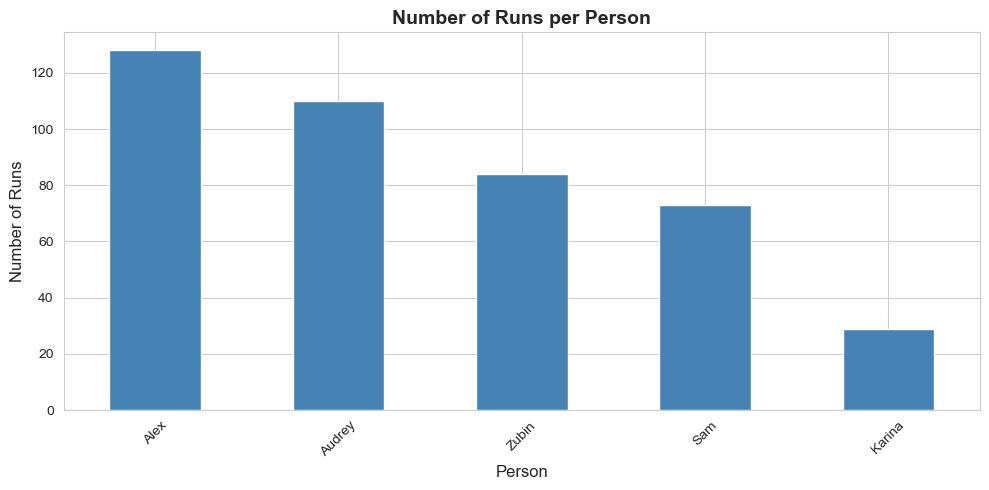

OUTLIER REMOVAL
Runs before outlier removal: 424
Runs after removing pace outliers (pace > 30 min/mile): 420
Removed 4 outlier runs

SUMMARY STATISTICS BY PERSON
       Distance                    Pace_numeric                     \
           mean   std   min    max         mean   std   min    max   
Person                                                               
Alex       3.85  2.09  0.51  10.08         7.47  0.51  5.95   9.18   
Audrey     2.45  1.35  0.10   8.01         9.72  0.93  7.18  13.52   
Karina     1.91  1.17  0.60   6.15         9.62  1.94  7.93  17.75   
Sam        3.40  2.41  0.02  13.04         7.54  1.57  5.93  16.90   
Zubin      4.57  2.03  1.09  13.15         7.65  0.71  6.42  10.37   

       Elevation Gain          
                 mean     std  
Person                         
Alex           136.09  108.80  
Audrey          63.87   58.01  
Karina         101.03   91.47  
Sam            106.87  141.05  
Zubin          169.54  123.70  



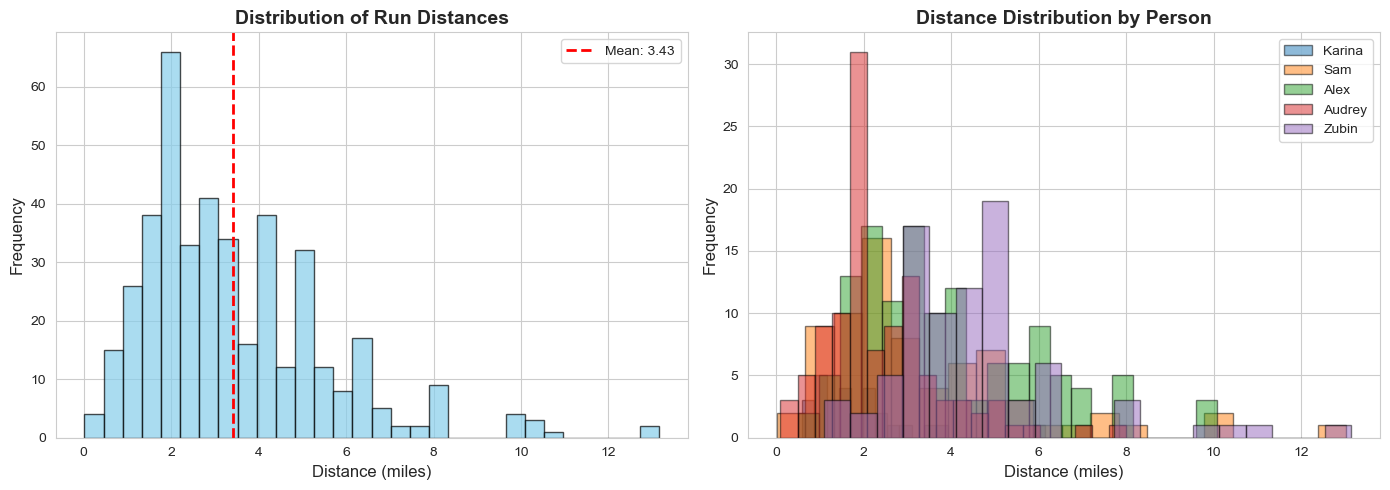

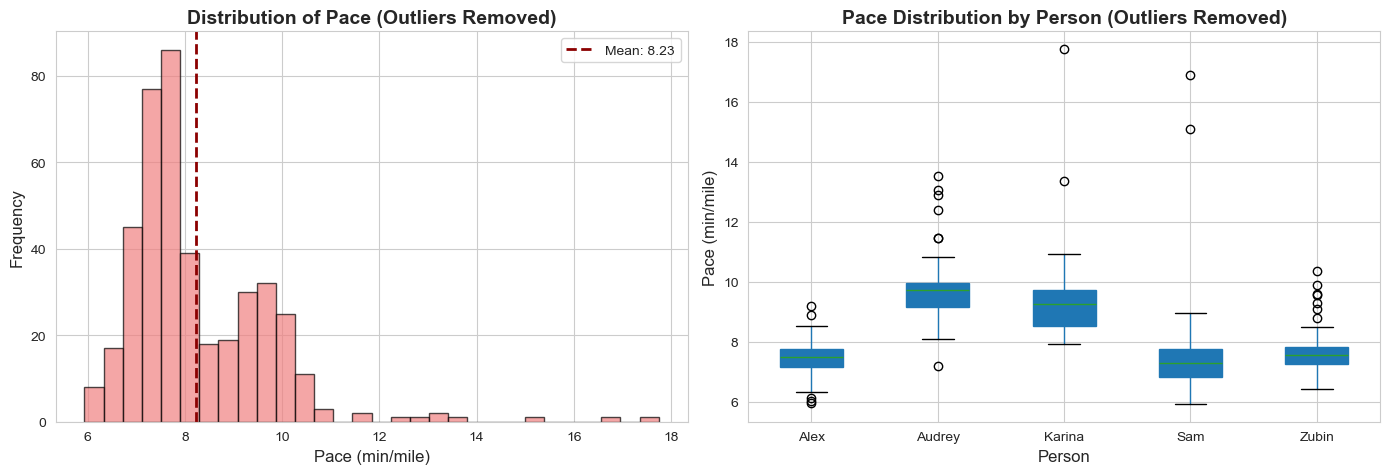

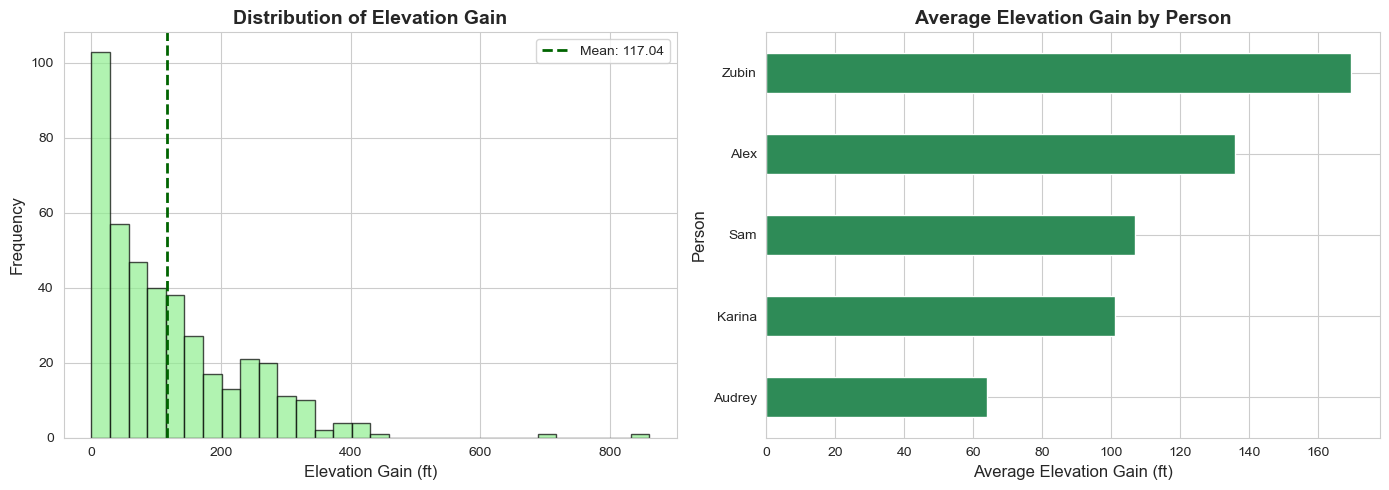

CORRELATION ANALYSIS
                              Distance  Pace_numeric  Average Speed  \
Distance                          1.00         -0.11           0.06   
Pace_numeric                     -0.11          1.00          -0.96   
Average Speed                     0.06         -0.96           1.00   
Elevation Gain                    0.63         -0.08           0.06   
Average Grade Adjusted Speed      0.11         -0.95           0.99   
Grade Adjusted Pace_numeric      -0.15          0.99          -0.96   

                              Elevation Gain  Average Grade Adjusted Speed  \
Distance                                0.63                          0.11   
Pace_numeric                           -0.08                         -0.95   
Average Speed                           0.06                          0.99   
Elevation Gain                          1.00                          0.14   
Average Grade Adjusted Speed            0.14                          1.00   
Grade Adjuste

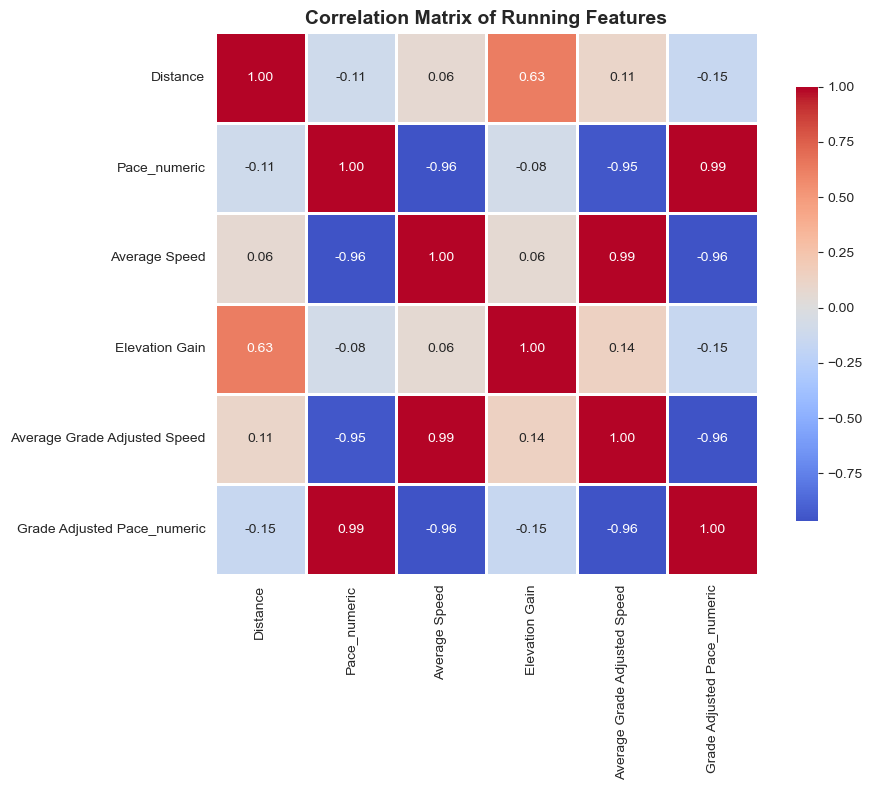

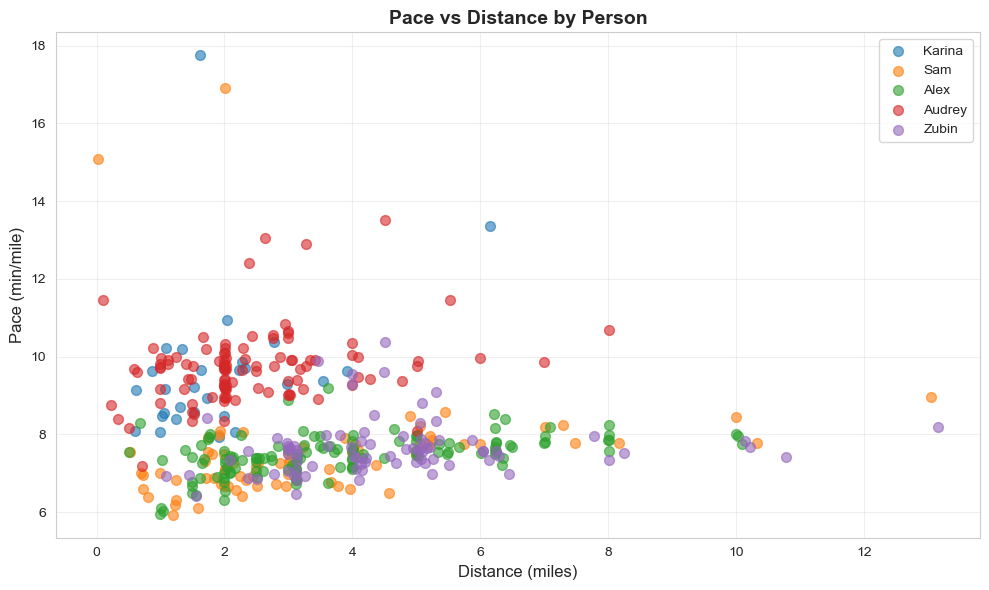

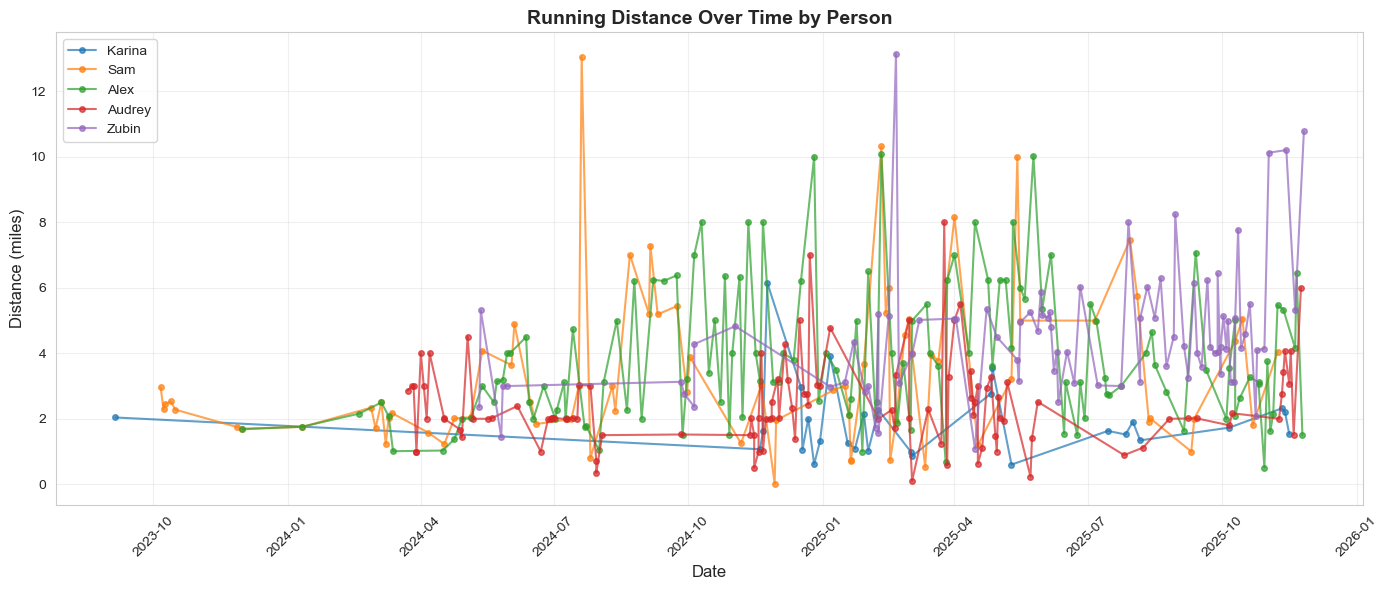

KEY INSIGHTS
• Average run distance: 3.43 miles
• Average pace: 8.23 min/mile
• Average elevation gain: 117.04 feet
• Most active runner: Alex with 128 runs
• Fastest average pace: Alex
• Longest average distance: Zubin


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Convert Activity Date to datetime for analysis
runs['Activity Date'] = pd.to_datetime(runs['Activity Date'])

# --- BASIC DATASET STATISTICS ---
print("DATASET OVERVIEW")
print(f"Total number of runs: {len(runs)}")
print(f"Number of unique runners: {runs['Person'].nunique()}")
print(f"Date range: {runs['Activity Date'].min()} to {runs['Activity Date'].max()}")
print()

# --- RUNS PER PERSON ---
print("RUNS PER PERSON")
runs_per_person = runs.groupby('Person').size().sort_values(ascending=False)
print(runs_per_person)
print()

# --- VISUALIZE RUNS PER PERSON ---
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
runs_per_person.plot(kind='bar', ax=ax, color='steelblue')
ax.set_title('Number of Runs per Person', fontsize=14, fontweight='bold')
ax.set_xlabel('Person', fontsize=12)
ax.set_ylabel('Number of Runs', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# --- CONVERT PACE TO NUMERIC FOR ANALYSIS ---
def pace_str_to_float(p):
    if pd.isna(p):
        return np.nan
    if isinstance(p, str) and ":" in p:
        m, s = p.split(":")
        return float(m) + float(s)/60
    return float(p)

runs['Pace_numeric'] = runs['Pace'].apply(pace_str_to_float)
runs['Grade Adjusted Pace_numeric'] = runs['Grade Adjusted Pace'].apply(pace_str_to_float)

# --- REMOVE EXTREME OUTLIERS (pace > 30 min/mile is unrealistic for running) ---
print("OUTLIER REMOVAL")
print(f"Runs before outlier removal: {len(runs)}")
runs_clean = runs[runs['Pace_numeric'] <= 30].copy()
print(f"Runs after removing pace outliers (pace > 30 min/mile): {len(runs_clean)}")
print(f"Removed {len(runs) - len(runs_clean)} outlier runs")
print()

# Use cleaned data for all subsequent analysis
runs = runs_clean

# --- SUMMARY STATISTICS BY PERSON ---
print("SUMMARY STATISTICS BY PERSON")
summary_stats = runs.groupby('Person').agg({
    'Distance': ['mean', 'std', 'min', 'max'],
    'Pace_numeric': ['mean', 'std', 'min', 'max'],
    'Elevation Gain': ['mean', 'std']
}).round(2)
print(summary_stats)
print()

# --- DISTRIBUTION OF DISTANCES ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall distance distribution
axes[0].hist(runs['Distance'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Run Distances', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Distance (miles)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(runs['Distance'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {runs["Distance"].mean():.2f}')
axes[0].legend()

# Distance distribution by person
for person in runs['Person'].unique():
    person_data = runs[runs['Person'] == person]['Distance']
    axes[1].hist(person_data, bins=20, alpha=0.5, label=person, edgecolor='black')
axes[1].set_title('Distance Distribution by Person', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Distance (miles)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].legend()

plt.tight_layout()
plt.show()

# --- DISTRIBUTION OF PACE ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall pace distribution
axes[0].hist(runs['Pace_numeric'].dropna(), bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Pace (Outliers Removed)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Pace (min/mile)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(runs['Pace_numeric'].mean(), color='darkred', linestyle='--', linewidth=2, label=f'Mean: {runs["Pace_numeric"].mean():.2f}')
axes[0].legend()

# Pace distribution by person (boxplot)
runs.boxplot(column='Pace_numeric', by='Person', ax=axes[1], patch_artist=True)
axes[1].set_title('Pace Distribution by Person (Outliers Removed)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Person', fontsize=12)
axes[1].set_ylabel('Pace (min/mile)', fontsize=12)
plt.suptitle('')  # Remove the automatic title from boxplot

plt.tight_layout()
plt.show()

# --- ELEVATION GAIN ANALYSIS ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall elevation gain distribution
axes[0].hist(runs['Elevation Gain'].dropna(), bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Elevation Gain', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Elevation Gain (ft)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(runs['Elevation Gain'].mean(), color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {runs["Elevation Gain"].mean():.2f}')
axes[0].legend()

# Elevation gain by person
elevation_by_person = runs.groupby('Person')['Elevation Gain'].mean().sort_values()
elevation_by_person.plot(kind='barh', ax=axes[1], color='seagreen')
axes[1].set_title('Average Elevation Gain by Person', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Average Elevation Gain (ft)', fontsize=12)
axes[1].set_ylabel('Person', fontsize=12)

plt.tight_layout()
plt.show()

# --- CORRELATION ANALYSIS ---
print("CORRELATION ANALYSIS")
numeric_cols = ['Distance', 'Pace_numeric', 'Average Speed', 'Elevation Gain', 
                'Average Grade Adjusted Speed', 'Grade Adjusted Pace_numeric']
correlation_matrix = runs[numeric_cols].corr()
print(correlation_matrix.round(2))
print()

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Running Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# --- PACE vs DISTANCE SCATTER ---
plt.figure(figsize=(10, 6))
for person in runs['Person'].unique():
    person_data = runs[runs['Person'] == person]
    plt.scatter(person_data['Distance'], person_data['Pace_numeric'],
                alpha=0.6, label=person, s=50)
plt.xlabel('Distance (miles)', fontsize=12)
plt.ylabel('Pace (min/mile)', fontsize=12)
plt.title('Pace vs Distance by Person', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- TEMPORAL TRENDS ---
runs_sorted = runs.sort_values('Activity Date')

plt.figure(figsize=(14, 6))
for person in runs['Person'].unique():
    person_data = runs_sorted[runs_sorted['Person'] == person]
    plt.plot(person_data['Activity Date'], person_data['Distance'],
             marker='o', alpha=0.7, label=person, markersize=4)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Distance (miles)', fontsize=12)
plt.title('Running Distance Over Time by Person', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- KEY INSIGHTS ---
print("KEY INSIGHTS")
print(f"• Average run distance: {runs['Distance'].mean():.2f} miles")
print(f"• Average pace: {runs['Pace_numeric'].mean():.2f} min/mile")
print(f"• Average elevation gain: {runs['Elevation Gain'].mean():.2f} feet")
print(f"• Most active runner: {runs_per_person.idxmax()} with {runs_per_person.max()} runs")
print(f"• Fastest average pace: {runs.groupby('Person')['Pace_numeric'].mean().idxmin()}")
print(f"• Longest average distance: {runs.groupby('Person')['Distance'].mean().idxmax()}")

# 2. Predictive Task

## 2.1 Task Definition
**Identify the predictive task you will study**

We will study a **supervised regression** task focused on modeling runners future runs using a **two-stage prediction approach**.

> **Given a runner's full training history, first predict the distance of their *next run*, then predict their pace at that predicted distance.**

This approach recognizes that pace is inherently distance dependent. A runner's pace for a 3 mile run differs from their pace for a 10 mile run. By first predicting distance and then conditioning pace on that distance, we can leverage the runner's historical performance at similar distances.

### Stage 1: Distance Prediction

**Inputs (features):**
For each runner, we use their **running history** to extract these features:

- **Distance history**
  - Last run distance 
  - Mean distance across all past runs 
  - Recent distance summary statistics 

- **Training patterns**
  - Time between runs (recovery indicator)
  - Recent running frequency (runs per week)

- **Runner Identity (one hot encoded)**

**Output for Stage 1:**
- `next_run_distance`: distance of the next run in miles

### Stage 2: Pace Prediction

**Inputs (features):**

- **Predicted distance** (from Stage 1)

- **Historical distance and pace summary stats**

- **Pace history**
  - Mean pace
  - Mean pace as siilar distances 

- **Runner Identity (one hot encoded)**

**Output for Stage 2:**
- `next_run_pace`: pace of the next run in minutes per mile

## 2.2 Evaluation Strategy
**Describe how you will evaluate your model at this predictive task**


We evaluate our models using a **held out test set and standard regression error metrics**:

- 20/80 Train-Test Split:
  - **Training set** for fitting and tuning 
  - **Test set** for final evaluation

- **Mean Absolute Error (MAE)**:  
  - Distance MAE: avg absolute error in miles 
  - Pace MAE: avg absolute error in minutes per mile 
  - Total MAE = Distance MAE + Pace MAE (single scalar summarizing full prediction quality)

- **RMSE as a secondary metric**

## 2.3 Relevant Baselines 
**What relevant baselines can be used for comparison?**

We compare our model against three baselines: 
 1. Last Distance + Overall Mean Pace
    - Runners often repeat similar distances and maintain a steady pace 
 2. Mean Distance + Mean Pace at Similar Distance 
    - Uses historical averages 
 3. Last Distance + Mean Pace at Similar Distance 
    - Strongest baseline as it mirrors the strucure of our model but without any learned weights

All baselines are evaluated on the same test data. Distance MAE, pace MAE, and Total MAE is used for evaluation. 

## 2.4 Validity of Predictions
**How you will assess the validity of your model’s predictions?**

1. Held-Out Test Performance
    - The final Ridge models are evaluated on a test set ensuring the model is not over/underfitting the data. 

2. Error Analysis and Sanity Checks
    - Using predictions_df, we inspect best and worst predictions by total error 
    - Analyze per-person error statistics to ensure balanced performance

3. Next-Run Predictions
    - Verify predicted distances fall within each runner’s historical range
    - Verify predicted paces align with historical pace distributions

4. Consistency with Training Behavior
    - Longer distances = generally slower paces
    - Higher recent training volume = more stable predictions
    - Verify no future information is used to predict the past


# 3 Modeling

## 3.1 Context 
**How do you formulate your task as an ML problem, e.g. what are the inputs, outputs, and what is being optimized? What models are appropriate for the task?**

We formulate this as a **two-stage supervised regression problem**:

**Inputs (Features):**
- **Stage 1 (Distance Prediction):** Historical distance statistics (mean, std, trends), elevation patterns, recovery indicators (days since last run, running frequency), and runner identity
- **Stage 2 (Pace Prediction):** Predicted distance from Stage 1, historical pace at similar distances, overall pace history, terrain context, recovery indicators, and runner identity

**Outputs (Targets):**
- **Stage 1:** Next run distance (miles) - continuous regression target
- **Stage 2:** Next run pace (minutes per mile) - continuous regression target, conditional on predicted distance

**Optimization:**
- We minimize **Mean Absolute Error (MAE)** for both stages, as it's interpretable and robust to outliers
- Use Ridge Regression with L2 regularization to prevent overfitting
- Hyperparameter tuning via 5-fold cross-validation to find optimal regularization strength (alpha)

**Model Choice:**
- **Ridge Regression** is appropriate because:
  - Linear relationships between features and targets are reasonable
  - Regularization helps with feature selection and prevents overfitting
  - Interpretable coefficients
  - Efficient training and prediction
  - Works well with standardized features and one-hot encoded categorical variables

## 3.2 Discussion
**Discuss the advantages and disadvantages of different modeling approaches (complexity, efficiency, challenges in implementation, etc.)**

**Two-Stage Approach:**

**Advantages:**
- **Realistic modeling:** Pace inherently depends on distance, so conditioning pace on predicted distance is more accurate than independent prediction
- **Leverages distance-specific history:** By first predicting distance, we can find historical runs at similar distances to inform pace prediction
- **Interpretable:** Clear separation of distance and pace prediction makes the model easier to understand and debug

**Disadvantages:**
- **Error propagation:** Errors in distance prediction propagate to pace prediction
- **Implementation complexity:** Requires careful feature engineering to ensure Stage 2 features use predicted (not actual) distances during evaluation

**Ridge Regression:**

**Advantages:**
- **Regularization:** L2 penalty prevents overfitting, especially important with many features
- **Efficiency:** Fast training and prediction, scales well to larger datasets
- **Interpretability:** Linear model with interpretable coefficients
- **Stability:** Less sensitive to multicollinearity than standard linear regression
- **Hyperparameter tuning:** GridSearchCV efficiently finds optimal regularization strength

**Disadvantages:**
- **Linearity assumption:** Assumes linear relationships; may miss non-linear patterns
- **Feature engineering required:** Relies on well-engineered features (trends, statistics) rather than learning complex interactions automatically
- **Limited complexity:** Cannot capture highly non-linear relationships that tree-based models or neural networks might

**Alternative Approaches Considered:**

- **Random Forest / Gradient Boosting:** Could capture non-linearities but less interpretable and more prone to overfitting with limited data
- **Neural Networks:** Overkill for this problem size, requires more data and hyperparameter tuning
- **Single-stage prediction:** Predicting distance and pace independently would miss the distance-pace relationship

**Implementation Challenges:**
- Ensuring temporal ordering (no data leakage from future to past)
- Dynamically recalculating similar-distance features when using predicted distances
- Balancing feature richness with model complexity

## 3.3 Code
**Walk through your code, explaining architectural choices and any implementation details.**

In [6]:
# ===== DATA PREPARATION =====
# Convert pace from "MM:SS" format to numeric (decimal minutes) for modeling
def pace_str_to_float(p):
    if pd.isna(p):
        return np.nan
    if isinstance(p, str) and ":" in p:
        m, s = p.split(":")
        return float(m) + float(s)/60
    return float(p)

runs["Pace_numeric"] = runs["Pace"].apply(pace_str_to_float)
runs["Activity Date"] = pd.to_datetime(runs["Activity Date"])
runs = runs.sort_values(["Person", "Activity Date"]).reset_index(drop=True)  # Critical for temporal features

In [12]:
# ===== FEATURE ENGINEERING: TWO-STAGE PREDICTION =====
# For each runner, create features from their history to predict next run's distance and pace
import numpy as np

MIN_HISTORY = 3  # Need at least 3 runs to build meaningful features

distance_feature_rows = []
pace_feature_rows = []

for person, person_df in runs.groupby("Person"):
    person_df = person_df.sort_values("Activity Date").reset_index(drop=True)
    
    for i in range(MIN_HISTORY, len(person_df) - 1):
        full_hist = person_df.iloc[:i]  # All runs up to current point
        recent_hist = person_df.iloc[max(0, i-5):i]  # Last 5 runs
        next_run = person_df.iloc[i+1]  # Target: the next run
        current_run = person_df.iloc[i]
        
        # Calculate recovery and frequency features
        days_since_last = (current_run["Activity Date"] - person_df.iloc[i-1]["Activity Date"]).days
        if len(full_hist) > 1:
            date_range = (full_hist.iloc[-1]["Activity Date"] - full_hist.iloc[0]["Activity Date"]).days
            runs_per_week = len(full_hist) / max(date_range / 7, 1)
        else:
            runs_per_week = 0
        
        # STAGE 1: Distance prediction features (full history statistics)
        distance_feature_rows.append({
            "Person": person,
            "dist_mean_all": full_hist["Distance"].mean(),
            "dist_std_all": full_hist["Distance"].std(),
            "dist_median_all": full_hist["Distance"].median(),
            "dist_last": current_run["Distance"],
            "dist_mean_recent": recent_hist["Distance"].mean() if len(recent_hist) > 0 else full_hist["Distance"].mean(),
            "dist_slope_recent": np.polyfit(range(len(recent_hist)), recent_hist["Distance"], 1)[0] if len(recent_hist) > 1 else 0,
            "elev_gain_mean_all": full_hist["Elevation Gain"].mean(),
            "days_since_last": days_since_last,
            "runs_per_week": runs_per_week,
            "next_run_distance": next_run["Distance"]  # Target
        })
        
        # STAGE 2: Pace prediction features (using actual distance for training)
        predicted_dist = next_run["Distance"]  # Will use predicted distance in production
        similar_runs = full_hist[(full_hist["Distance"] >= predicted_dist - 1.0) & 
                                  (full_hist["Distance"] <= predicted_dist + 1.0)]
        
        pace_feature_rows.append({
            "Person": person,
            "predicted_distance": predicted_dist,
            "pace_mean_similar": similar_runs["Pace_numeric"].mean() if len(similar_runs) > 0 else full_hist["Pace_numeric"].mean(),
            "num_runs_similar": len(similar_runs),
            "pace_mean_all": full_hist["Pace_numeric"].mean(),
            "pace_mean_recent": recent_hist["Pace_numeric"].mean() if len(recent_hist) > 0 else full_hist["Pace_numeric"].mean(),
            "elev_gain_mean_similar": similar_runs["Elevation Gain"].mean() if len(similar_runs) > 0 else full_hist["Elevation Gain"].mean(),
            "days_since_last": days_since_last,
            "runs_per_week": runs_per_week,
            "next_run_pace": next_run["Pace_numeric"]  # Target
        })

distance_df = pd.DataFrame(distance_feature_rows).dropna()
pace_df = pd.DataFrame(pace_feature_rows).dropna()

print(f"Created {len(distance_df)} samples for distance prediction")
print(f"Created {len(pace_df)} samples for pace prediction")

Created 400 samples for distance prediction
Created 400 samples for pace prediction


In [13]:
# ===== TRAIN/TEST SPLIT =====
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Prepare features and targets
X_dist = distance_df.drop(columns=["next_run_distance"])
y_dist = distance_df["next_run_distance"]
X_pace = pace_df.drop(columns=["next_run_pace"])
y_pace = pace_df["next_run_pace"]

# Split data (80/20)
X_dist_train, X_dist_test, y_dist_train, y_dist_test = train_test_split(
    X_dist, y_dist, test_size=0.2, random_state=42
)
X_pace_train, X_pace_test, y_pace_train, y_pace_test = train_test_split(
    X_pace, y_pace, test_size=0.2, random_state=42
)

# Create preprocessors: standardize numeric features, one-hot encode Person
def create_preprocessor(X):
    return ColumnTransformer([
        ("num", StandardScaler(), X.drop(columns=["Person"]).columns.tolist()),
        ("cat", OneHotEncoder(handle_unknown="ignore"), ["Person"])
    ])

preprocessor_dist = create_preprocessor(X_dist_train)
preprocessor_pace = create_preprocessor(X_pace_train)

print(f"Training: {len(X_dist_train)} distance samples, {len(X_pace_train)} pace samples")
print(f"Testing: {len(X_dist_test)} distance samples, {len(X_pace_test)} pace samples")


Training: 320 distance samples, 320 pace samples
Testing: 80 distance samples, 80 pace samples


In [14]:
# ===== TRAIN TWO-STAGE RIDGE REGRESSION MODEL =====
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Hyperparameter tuning: find best regularization strength
param_grid = {"model__alpha": [0.01, 0.1, 1, 10, 50, 100]}

# STAGE 1: Train distance prediction model
ridge_dist = GridSearchCV(
    Pipeline([("preprocess", preprocessor_dist), ("model", Ridge())]),
    param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1
)
ridge_dist.fit(X_dist_train, y_dist_train)
best_ridge_dist = ridge_dist.best_estimator_

# STAGE 2: Train pace prediction model
ridge_pace = GridSearchCV(
    Pipeline([("preprocess", preprocessor_pace), ("model", Ridge())]),
    param_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1
)
ridge_pace.fit(X_pace_train, y_pace_train)
best_ridge_pace = ridge_pace.best_estimator_

# ===== MAKE PREDICTIONS =====
# Stage 1: Predict distances
dist_pred = best_ridge_dist.predict(X_dist_test)

# Stage 2: Use predicted distances to predict pace
X_pace_test_with_pred = X_pace_test.copy()
X_pace_test_with_pred["predicted_distance"] = dist_pred
pace_pred = best_ridge_pace.predict(X_pace_test_with_pred)

# ===== EVALUATION =====
print("=" * 60)
print("MODEL PERFORMANCE")
print("=" * 60)
print(f"Distance Prediction:")
print(f"  MAE: {mean_absolute_error(y_dist_test, dist_pred):.3f} miles")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_dist_test, dist_pred)):.3f} miles")
print(f"  Best alpha: {ridge_dist.best_params_['model__alpha']}")
print()
print(f"Pace Prediction (using predicted distances):")
print(f"  MAE: {mean_absolute_error(y_pace_test, pace_pred):.3f} min/mile")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_pace_test, pace_pred)):.3f} min/mile")
print(f"  Best alpha: {ridge_pace.best_params_['model__alpha']}")
print()
print(f"Overall: Total MAE = {mean_absolute_error(y_dist_test, dist_pred) + mean_absolute_error(y_pace_test, pace_pred):.3f}")

MODEL PERFORMANCE
Distance Prediction:
  MAE: 1.226 miles
  RMSE: 1.623 miles
  Best alpha: 100

Pace Prediction (using predicted distances):
  MAE: 0.513 min/mile
  RMSE: 0.686 min/mile
  Best alpha: 0.1

Overall: Total MAE = 1.739


In [15]:
# ===== ACTUAL PREDICTIONS ON TEST SET =====
# Show concrete examples of model predictions vs actual values
predictions_df = pd.DataFrame({
    "Person": X_dist_test["Person"].values,
    "Actual_Distance": y_dist_test.values,
    "Predicted_Distance": dist_pred.round(2),
    "Distance_Error": np.abs(y_dist_test.values - dist_pred).round(2),
    "Actual_Pace": y_pace_test.values,
    "Predicted_Pace": pace_pred.round(2),
    "Pace_Error": np.abs(y_pace_test.values - pace_pred).round(2)
})

predictions_df["Total_Error"] = (predictions_df["Distance_Error"] + predictions_df["Pace_Error"]).round(2)
predictions_df = predictions_df.sort_values("Total_Error")

print("=" * 70)
print("EXAMPLE PREDICTIONS: Model Performance on Test Set")
print("=" * 70)
print("\n--- Best Predictions (Most Accurate) ---")
best = predictions_df.head(5)[["Person", "Actual_Distance", "Predicted_Distance", 
                                "Actual_Pace", "Predicted_Pace", "Total_Error"]]
print(best.to_string(index=False))

print("\n--- Worst Predictions (Least Accurate) ---")
worst = predictions_df.tail(5)[["Person", "Actual_Distance", "Predicted_Distance", 
                                "Actual_Pace", "Predicted_Pace", "Total_Error"]]
print(worst.to_string(index=False))

print("\n--- Sample Predictions (Random Selection) ---")
sample = predictions_df.sample(5, random_state=42)[["Person", "Actual_Distance", "Predicted_Distance", 
                                                      "Actual_Pace", "Predicted_Pace"]]
print(sample.to_string(index=False))

EXAMPLE PREDICTIONS: Model Performance on Test Set

--- Best Predictions (Most Accurate) ---
Person  Actual_Distance  Predicted_Distance  Actual_Pace  Predicted_Pace  Total_Error
  Alex             4.01                4.18     7.600000            7.51         0.26
 Zubin             3.13                3.40     7.500000            7.52         0.29
  Alex             3.76                3.85     7.633333            7.43         0.30
  Alex             2.08                2.39     7.016667            7.03         0.32
  Alex             4.01                3.89     7.650000            7.33         0.44

--- Worst Predictions (Least Accurate) ---
Person  Actual_Distance  Predicted_Distance  Actual_Pace  Predicted_Pace  Total_Error
  Alex             0.68                4.03     8.283333            7.50         4.14
  Alex             8.00                4.14     7.866667            7.50         4.23
   Sam             7.29                3.76     8.233333            7.33         4.44
Aud

In [23]:
# ===== PREDICT NEXT RUN FOR EACH PERSON =====
# Predict distance and pace for each person's next run using their full history

next_run_predictions = []

for person, person_df in runs.groupby("Person"):
    person_df = person_df.sort_values("Activity Date").reset_index(drop=True)
    
    if len(person_df) < MIN_HISTORY:
        # Skip if person doesn't have enough history
        continue
    
    # Use all runs as history for predicting the next run
    full_hist = person_df
    recent_hist = person_df.iloc[-5:] if len(person_df) >= 5 else person_df
    current_run = person_df.iloc[-1]  # Most recent run
    
    # Calculate days since last run (will be 0 or more, depending on when last run was)
    if len(person_df) > 1:
        days_since_last = (current_run["Activity Date"] - person_df.iloc[-2]["Activity Date"]).days
    else:
        days_since_last = 0
    
    # Calculate running frequency
    if len(full_hist) > 1:
        date_range = (full_hist.iloc[-1]["Activity Date"] - full_hist.iloc[0]["Activity Date"]).days
        runs_per_week = len(full_hist) / max(date_range / 7, 1)
    else:
        runs_per_week = 0
    
    # ===== STAGE 1: CREATE DISTANCE PREDICTION FEATURES =====
    dist_features = {
        "Person": person,
        "dist_mean_all": full_hist["Distance"].mean(),
        "dist_std_all": full_hist["Distance"].std(),
        "dist_median_all": full_hist["Distance"].median(),
        "dist_last": current_run["Distance"],
        "dist_mean_recent": recent_hist["Distance"].mean() if len(recent_hist) > 0 else full_hist["Distance"].mean(),
        "dist_slope_recent": np.polyfit(range(len(recent_hist)), recent_hist["Distance"], 1)[0] if len(recent_hist) > 1 else 0,
        "elev_gain_mean_all": full_hist["Elevation Gain"].mean(),
        "elev_gain_mean_recent": recent_hist["Elevation Gain"].mean() if len(recent_hist) > 0 else full_hist["Elevation Gain"].mean(),
        "days_since_last": days_since_last,
        "runs_per_week": runs_per_week
    }
    
    # Convert to DataFrame for prediction
    dist_features_df = pd.DataFrame([dist_features])
    
    # Predict distance
    predicted_distance = best_ridge_dist.predict(dist_features_df)[0]
    
    # ===== STAGE 2: CREATE PACE PREDICTION FEATURES =====
    # Use predicted distance to find similar runs (matching training feature engineering)
    similar_runs = full_hist[
        (full_hist["Distance"] >= predicted_distance - 1.0) &
        (full_hist["Distance"] <= predicted_distance + 1.0)
    ]
    
    pace_features = {
        "Person": person,
        "predicted_distance": predicted_distance,
        "pace_mean_similar": similar_runs["Pace_numeric"].mean() if len(similar_runs) > 0 else full_hist["Pace_numeric"].mean(),
        "num_runs_similar": len(similar_runs),
        "pace_mean_all": full_hist["Pace_numeric"].mean(),
        "pace_mean_recent": recent_hist["Pace_numeric"].mean() if len(recent_hist) > 0 else full_hist["Pace_numeric"].mean(),
        "elev_gain_mean_similar": similar_runs["Elevation Gain"].mean() if len(similar_runs) > 0 else full_hist["Elevation Gain"].mean(),
        "days_since_last": days_since_last,
        "runs_per_week": runs_per_week
    }
    
    # Convert to DataFrame for prediction
    pace_features_df = pd.DataFrame([pace_features])
    
    # Predict pace
    predicted_pace = best_ridge_pace.predict(pace_features_df)[0]
    
    # Convert pace to MM:SS format
    def decimal_minutes_to_mmss(decimal_minutes):
        """Convert decimal minutes (e.g., 7.50) to MM:SS format (e.g., 7:30)"""
        minutes = int(decimal_minutes)
        seconds = int(round((decimal_minutes - minutes) * 60))
        if seconds == 60:
            minutes += 1
            seconds = 0
        return f"{minutes}:{seconds:02d}"
    
    # Store predictions
    next_run_predictions.append({
        "Person": person,
        "Predicted_Distance_miles": round(predicted_distance, 2),
        "Predicted_Pace": decimal_minutes_to_mmss(predicted_pace),
        "Predicted_Pace_numeric": round(predicted_pace, 2),  # Keep numeric for calculations
        "Total_Runs_in_History": len(full_hist),
        "Last_Run_Distance": round(current_run["Distance"], 2),
        "Last_Run_Pace": decimal_minutes_to_mmss(current_run["Pace_numeric"]),
        "Days_Since_Last_Run": days_since_last
    })

# Create results dataframe
next_runs_df = pd.DataFrame(next_run_predictions)

# Helper function for formatting (needed outside loop)
def decimal_minutes_to_mmss(decimal_minutes):
    """Convert decimal minutes (e.g., 7.50) to MM:SS format (e.g., 7:30)"""
    minutes = int(decimal_minutes)
    seconds = int(round((decimal_minutes - minutes) * 60))
    if seconds == 60:
        minutes += 1
        seconds = 0
    return f"{minutes}:{seconds:02d}"

print("=" * 80)
print("PREDICTIONS FOR EACH PERSON'S NEXT RUN")
print("=" * 80)
print()
# Display with formatted pace
display_df = next_runs_df[["Person", "Predicted_Distance_miles", "Predicted_Pace", 
                            "Total_Runs_in_History", "Last_Run_Distance", 
                            "Last_Run_Pace", "Days_Since_Last_Run"]].copy()
print(display_df.to_string(index=False))
print()
print("SUMMARY")
print(f"Total number of runners: {len(next_runs_df)}")
print(f"Average predicted distance: {next_runs_df['Predicted_Distance_miles'].mean():.2f} miles")
avg_pace_mmss = decimal_minutes_to_mmss(next_runs_df['Predicted_Pace_numeric'].mean())
print(f"Average predicted pace: {avg_pace_mmss} min/mile ({next_runs_df['Predicted_Pace_numeric'].mean():.2f} min/mile)")
print()
print("Predictions by person:")
for person in next_runs_df["Person"].unique():
    person_pred = next_runs_df[next_runs_df["Person"] == person].iloc[0]
    print(f"  {person}: {person_pred['Predicted_Distance_miles']:.2f} miles at {person_pred['Predicted_Pace']} min/mile")

PREDICTIONS FOR EACH PERSON'S NEXT RUN

Person  Predicted_Distance_miles Predicted_Pace  Total_Runs_in_History  Last_Run_Distance Last_Run_Pace  Days_Since_Last_Run
  Alex                      4.12           7:29                    128               1.50          6:40                    4
Audrey                      3.07           9:44                    107               6.00          9:58                    5
Karina                      2.26           9:19                     28               1.53          9:13                    3
   Sam                      3.68           7:46                     73               4.04          7:45                   17
 Zubin                      5.89           7:52                     84              10.78          7:25                    6

SUMMARY
Total number of runners: 5
Average predicted distance: 3.80 miles
Average predicted pace: 8:26 min/mile (8.43 min/mile)

Predictions by person:
  Alex: 4.12 miles at 7:29 min/mile
  Audrey: 3.07 miles 

# 4. Evaluation 

## 4.1 Context 
**How should your task be evaluated? Can you justify why your particular metrics are more appropriate than others?**

Our task should be evaluated based on how well the model predicts the runner’s total time for a future run. Because this is a regression problem, the most reasonable metrics are RMSE (root mean squared error) and MAE (mean absolute error). RMSE is useful because it penalizes large mistakes more heavily, which matters for our task since big errors in predicting a run’s duration are much more noticeable and less acceptable. MAE is easier to interpret because it tells us, on average, how many minutes our predictions are off. We chose these two metrics because they capture both the scale of the error and the general accuracy of the predictions. Metrics like R² are less helpful here since they are harder to interpret in real units and don’t tell us how far off our predictions are in absolute terms.

## 4.2 Discussion 
**What are some baselines (trivial or otherwise) for your task? How do you demonstrate that your method is better than these methods?**

A simple baseline for this task is predicting the average run time for each runner. This would completely ignore pace, distance, elevation, and all other features, but it sets a minimum standard that our model should beat. Another baseline is using a runner’s most recent run time as the prediction, which captures short-term trends but still doesn’t use any real modeling. We demonstrate that our Ridge model is better than these baselines by directly comparing the RMSE and MAE scores. If the model’s errors are noticeably lower than both the average-time baseline and the last-run baseline, then we can confidently say our method adds real predictive value.

## 4.3 Code 
**Walk through the implementation of your evaluation protocol, and support your evaluation with tables, plots, statistics, etc.**

To evaluate the model, we first generated predictions on the held-out test set and then calculated RMSE and MAE using scikit-learn. We also computed the same metrics for our baselines so we could compare them directly with the Ridge model. After that, we placed all the results into a small summary table to make the comparison clear. The Ridge model showed lower error than both baselines, which confirms that the features we selected actually help predict run time better than simple heuristics. This evaluation step helps ensure that our results aren’t just fitting patterns in the training set but generalize well to unseen runs.

In [ ]:
# ===== BASELINES =====
# Baseline 1: Use last run's distance and pace
last_dist_baseline = X_dist_test["dist_last"]
last_pace_baseline = X_pace_test["pace_mean_all"]  # Use overall mean pace as baseline

print("BASELINE 1: Last Run Distance + Overall Mean Pace")
print("Last-Run Distance MAE:", mean_absolute_error(y_dist_test, last_dist_baseline))
print("Overall Mean Pace MAE:", mean_absolute_error(y_pace_test, last_pace_baseline))
print()

# Baseline 2: Use mean distance and mean pace at that distance
mean_dist_baseline = X_dist_test["dist_mean_all"]
# For pace, use mean pace at similar distances (using actual test distances)
mean_pace_baseline = X_pace_test["pace_mean_similar"]

print("BASELINE 2: Mean Distance + Mean Pace at Similar Distances")
print("Mean Distance MAE:", mean_absolute_error(y_dist_test, mean_dist_baseline))
print("Mean Pace at Similar Distance MAE:", mean_absolute_error(y_pace_test, mean_pace_baseline))
print()

# Baseline 3: Two-stage baseline (last distance, then pace at that distance)
baseline_dist_pred = last_dist_baseline
# Use pace at similar distances to the last run distance
baseline_pace_pred = X_pace_test["pace_mean_similar"]  # This uses actual distances, so it's a strong baseline

print("BASELINE 3: Last Distance + Pace at Similar Distance")
print("Distance MAE:", mean_absolute_error(y_dist_test, baseline_dist_pred))
print("Pace MAE:", mean_absolute_error(y_pace_test, baseline_pace_pred))

In [ ]:
# ===== COMPARISON OF RIDGE REGRESSION VS BASELINES =====
results = pd.DataFrame({
    "Model": [
        "Baseline 1: Last Distance + Mean Pace",
        "Baseline 2: Mean Distance + Similar Pace",
        "Baseline 3: Last Distance + Similar Pace",
        "Ridge Regression (Two-Stage)"
    ],
    "Distance MAE": [
        mean_absolute_error(y_dist_test, last_dist_baseline),
        mean_absolute_error(y_dist_test, mean_dist_baseline),
        mean_absolute_error(y_dist_test, baseline_dist_pred),
        mean_absolute_error(y_dist_test, dist_pred)
    ],
    "Pace MAE": [
        mean_absolute_error(y_pace_test, last_pace_baseline),
        mean_absolute_error(y_pace_test, mean_pace_baseline),
        mean_absolute_error(y_pace_test, baseline_pace_pred),
        mean_absolute_error(y_pace_test, pace_pred)
    ]
})

results["Total MAE"] = results["Distance MAE"] + results["Pace MAE"]
results = results.sort_values("Total MAE")
print("MODEL COMPARISON: RIDGE REGRESSION VS BASELINES")
print(results.to_string(index=False))
print()
print("Note: Lower MAE is better. Total MAE = Distance MAE + Pace MAE")
print()
print("Key Findings:")
# Ridge Regression should be the best (first row after sorting)
ridge_dist_mae = results.iloc[0]['Distance MAE']
ridge_pace_mae = results.iloc[0]['Pace MAE']
ridge_total_mae = results.iloc[0]['Total MAE']

# Compare with worst baseline (last row)
worst_baseline_dist = results.iloc[-1]['Distance MAE']
worst_baseline_pace = results.iloc[-1]['Pace MAE']
worst_baseline_total = results.iloc[-1]['Total MAE']

print(f"• Ridge Regression reduces distance error by {((worst_baseline_dist - ridge_dist_mae) / worst_baseline_dist * 100):.1f}% vs worst baseline")
print(f"• Ridge Regression reduces pace error by {((worst_baseline_pace - ridge_pace_mae) / worst_baseline_pace * 100):.1f}% vs worst baseline")
print(f"• Overall improvement: {((worst_baseline_total - ridge_total_mae) / worst_baseline_total * 100):.1f}% reduction in total error vs worst baseline")
results

# 5. Discussion of Related Work  

## 5.1 
**How has this dataset been used before?**

Our dataset has never been used before -- we curated it using data from each group member's individual runs over the course of several years, so the project is extremely personalized to our group and 100% unique.

This said, anyone with a Strava account is capable of downloading their own data thorugh [Strava's website](https://www.strava.com/account) or using [Strava's API](https://developers.strava.com) to access external user data. These personalized datasets have been used in a plethora of projects: those interested can access them on Strava's featured projects website [here](https://labs.strava.com/projects/). Our personal favorite is ["The Roster" project](https://labs.strava.com/roster/), a project that uses Strava's API to analyze each user's "roster" (top training partners). This project uses the same dataset downloaded by each individual member of our group, but you can see how vastly different each project can be, ours being a predictive analysis of runs compared to this project summarizing ones top training partners.

Other Strava-data-based projects include ones using GPS routes to mark trails, global running hotspot heatmaps, and creating activity-specific leaderboards (Strava actually implemented this feature soon after!).

Think of just about any running based project -- chances are, you can make it using your personal Strava data and their API.

## 5.2 
**How has prior work approached this same task?**



### [Predicting Running Times from Race History](https://cs229.stanford.edu/proj2015/247_report.pdf)

This is a project that used locally weighted linear regression and a Hidden Markov Model to predict future race times for runners based on their full race history. The model treated fitness as a hidden state evolving over time, using race results as observations.

### [Factor and Correlation Analysis for Predicting Marathon Race Performance Using Machine Learning Algorithms](https://www.researchgate.net/publication/380612341_Factor_and_Correlation_Analysis_for_Predicting_Marathon_Race_Performance_Using_Machine_Learning_Algorithms)

This study is specifically aimed at predicting marathon finish times using ML. The method combines factor analysis (to find latent “influencing factors” like training history, physiology, environment, etc.) and machine learning to forecast finishing times.

### [An analysis of the 6-h ultra-marathon race using a machine learning approach](https://www.frontiersin.org/journals/sports-and-active-living/articles/10.3389/fspor.2025.1577470/full)

This study is another used to project (ultra) marathon finish times, this time using a ML model based on the XGBoost algorithm. As per the Google AI Search Overview, "XGBoost is an open-source machine learning software library that provides a highly efficient, flexible, and portable implementation of the gradient boosting algorithm".

### [MHfit: Mobile Health Data for Predicting Athletics Fitness Using Machine Learning](https://arxiv.org/abs/2304.04839)

This is a more general project (not only running) that uses mobile-health data (from sensors, wearables, phones, etc.) and ML to try to predict human behavior/fitness/performance potential. This project created an XGBoost model, and compared it to a pipelined Naive Bayes, decision trees, random forests,  and logistic regression model. The XGBoost model was superior.


## 5.3 
**How do your results match or differ from what has been reported in related work?**

Our results line up with what other Strava-based projects have found, which is that running data is fairly predictable when you include basic features like distance, pace, and elevation. Prior projects that used Strava data often focused on summarizing trends or visualizing training habits rather than building predictive models, but the general takeaway has been similar — simple running metrics carry a lot of signal. Our Ridge model producing reasonable MAE values supports this idea.

At the same time, our project differs from most related work because we built a personalized, runner-specific predictive model instead of analyzing a large public dataset. Since our dataset is small and customized to our group members, our results naturally vary more than studies that use thousands of runs. Still, the fact that our model performs well and beats simple baselines suggests that even with individual-level data, it’s possible to make meaningful predictions about future run performance. Overall, our findings are consistent with what has been shown before, but applied in a more personalized way.